In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
plt.rcParams['font.family']=['Heiti TC']
plt.rcParams['figure.figsize']=(20,10)

In [3]:
fp='tutorial/chapter4/demo/data/discretization_data.xls'
data=pd.read_excel(fp)

In [4]:
data.head()

,肝气郁结证型系数
0,0.056
1,0.488
2,0.107
3,0.322
4,0.242


In [5]:
data.describe()

,肝气郁结证型系数
count,930.000000
mean,0.232154
std,0.078292
min,0.026000
25%,0.176250
50%,0.231000
75%,0.281750
max,0.504000


<AxesSubplot:>

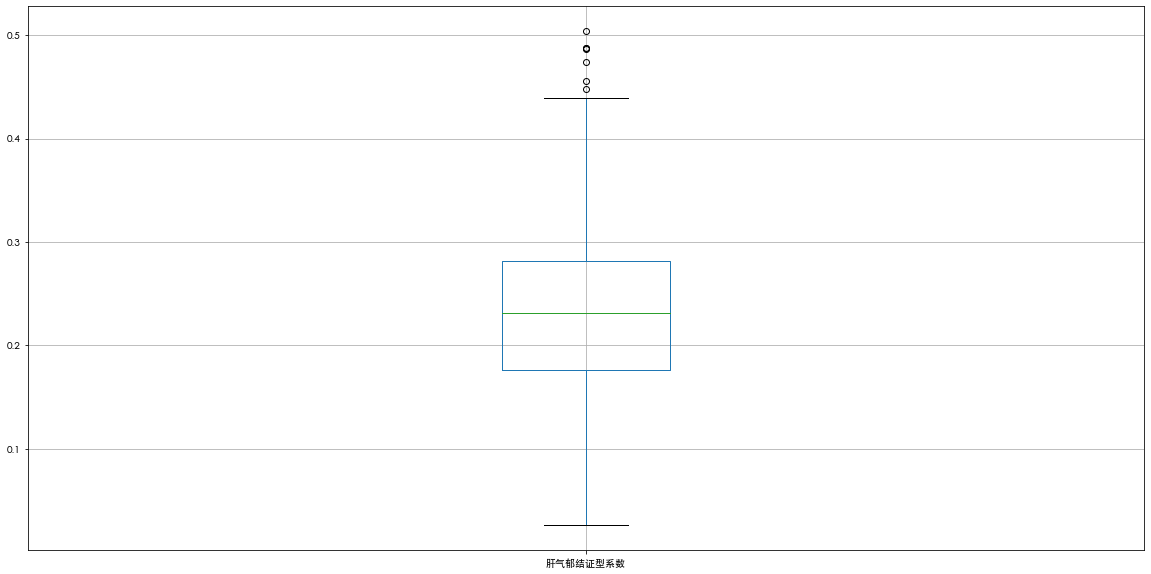

In [6]:
data.boxplot()

In [9]:
data=data['肝气郁结证型系数'].copy()

In [7]:
k=4

In [10]:
d1=pd.cut(data,k,labels=range(k))

In [11]:
d1

0      0
1      3
2      0
3      2
4      1
      ..
925    2
926    0
927    2
928    2
929    1
Name: 肝气郁结证型系数, Length: 930, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [20]:
kmodel=KMeans(n_clusters=k)

In [21]:
kmodel.fit(np.array(data).reshape((len(data),1)))

KMeans(n_clusters=4)

In [23]:
c=pd.DataFrame(kmodel.cluster_centers_).sort_values(0)

In [25]:
w=c.rolling(2).mean()
w=w.dropna()

In [26]:
w

,0
2,0.180011
1,0.258551
3,0.352043


In [27]:
w=[0]+list(w[0])+[data.max()]

In [29]:
d3=pd.cut(data,w,labels=range(k))

In [30]:
def cluster_plot(d,k):
    for j in range(0,k):
        plt.plot(data[d==j],[j for i in d[d==j]],'o')

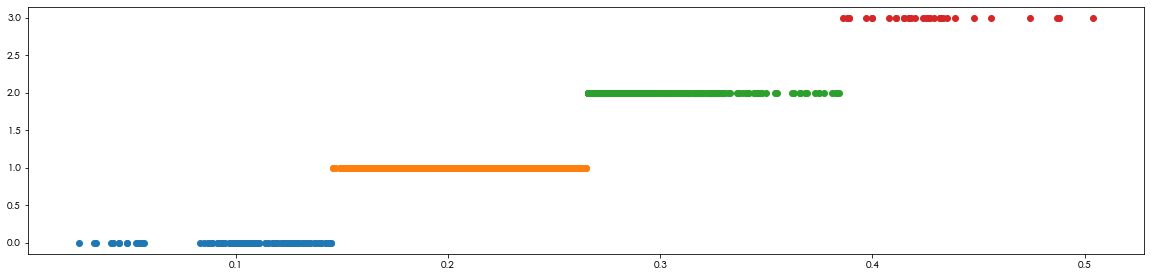

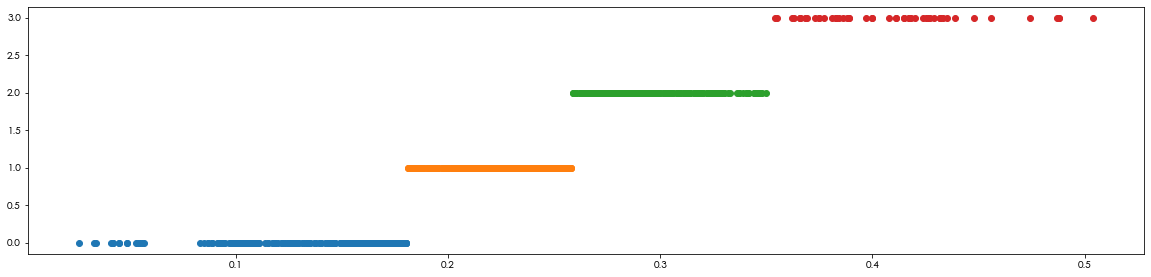

In [33]:
plt.subplot(211)
cluster_plot(d1,k)
plt.subplot(212)
cluster_plot(d3,k)
plt.show()

In [34]:
inputfile='tutorial/chapter4/demo/data/electricity_data.xls'
output='tutorial/chapter4/demo/tmp/electricity_data.xls'

In [35]:
data=pd.read_excel(inputfile)

In [36]:
data.head()

,供入电量,供出电量
0,986,912
1,1208,1083
2,1108,975
3,1082,934
4,1285,1102


In [37]:
data['线损率']=(data['供入电量']-data['供出电量'])/data['供入电量']

In [39]:
data.to_excel(output,index=False)

<ipython-input-39-2df46290c386>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.to_excel(output,index=False)


In [44]:
inputfile='tutorial/chapter4/demo/data/principal_component.xls'
data=pd.read_excel(inputfile,header=None)

In [45]:
data.head()

,0,1,2,3,4,5,6,7
0,40.4,24.7,7.2,6.1,8.3,8.7,2.442,20.0
1,25.0,12.7,11.2,11.0,12.9,20.2,3.542,9.1
2,13.2,3.3,3.9,4.3,4.4,5.5,0.578,3.6
3,22.3,6.7,5.6,3.7,6.0,7.4,0.176,7.3
4,34.3,11.8,7.1,7.1,8.0,8.9,1.726,27.5


In [46]:
pca=PCA()
pca.fit(data)

PCA()

In [49]:
pca.components_.shape

(8, 8)

In [50]:
pca.explained_variance_ratio_

array([7.74011263e-01, 1.56949443e-01, 4.27594216e-02, 2.40659228e-02,
       1.50278048e-03, 4.10990447e-04, 2.07718405e-04, 9.24594471e-05])

In [51]:
np.cumsum(pca.explained_variance_ratio_)*100

array([ 77.40112633,  93.09607068,  97.37201284,  99.77860512,
        99.92888317,  99.96998221,  99.99075406, 100.        ])

In [52]:
pca=PCA(3)
pca.fit(data)

PCA(n_components=3)

In [53]:
pca.components_

array([[ 0.56788461,  0.2280431 ,  0.23281436,  0.22427336,  0.3358618 ,
         0.43679539,  0.03861081,  0.46466998],
       [ 0.64801531,  0.24732373, -0.17085432, -0.2089819 , -0.36050922,
        -0.55908747,  0.00186891,  0.05910423],
       [-0.45139763,  0.23802089, -0.17685792, -0.11843804, -0.05173347,
        -0.20091919, -0.00124421,  0.80699041]])

In [54]:
pca.explained_variance_ratio_

array([0.77401126, 0.15694944, 0.04275942])

In [55]:
low_d=pca.transform(data)

In [58]:
low_d

array([[  8.19133694,  16.90402785,   3.90991029],
       [  0.28527403,  -6.48074989,  -4.62870368],
       [-23.70739074,  -2.85245701,  -0.4965231 ],
       [-14.43202637,   2.29917325,  -1.50272151],
       [  5.4304568 ,  10.00704077,   9.52086923],
       [ 24.15955898,  -9.36428589,   0.72657857],
       [ -3.66134607,  -7.60198615,  -2.36439873],
       [ 13.96761214,  13.89123979,  -6.44917778],
       [ 40.88093588, -13.25685287,   4.16539368],
       [ -1.74887665,  -4.23112299,  -0.58980995],
       [-21.94321959,  -2.36645883,   1.33203832],
       [-36.70868069,  -6.00536554,   3.97183515],
       [  3.28750663,   4.86380886,   1.00424688],
       [  5.99885871,   4.19398863,  -8.59953736]])